# Question 1
Whats the difference between average price of Airbnb in both the cities?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
seattle_data =  pd.read_csv('listings_seattle.csv')
seattle_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
boston_data =  pd.read_csv('listings_boston.csv')
boston_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
seattle_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
null_columns = seattle_data.columns[seattle_data.isnull().sum()>0]
null_columns
to_drop = seattle_data[null_columns].isnull().sum() / seattle_data.shape[0] * 100
to_drop = to_drop[to_drop > 50]
to_drop

square_feet          97.459403
monthly_price        60.267156
security_deposit     51.126244
license             100.000000
dtype: float64

In [6]:
seattle_data_new = seattle_data.drop(['square_feet','monthly_price','security_deposit', 'license'], axis=1)
seattle_data_new

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,10.0,8.0,f,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,10.0,f,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,NaN,f,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,NaN,f,WASHINGTON,f,moderate,f,f,1,NaN


In [7]:
boston_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [8]:
null_columns1 = boston_data.columns[boston_data.isnull().sum()>0]
null_columns1
to_drop1 = boston_data[null_columns1].isnull().sum() / boston_data.shape[0] * 100
to_drop1 = to_drop1[to_drop1 > 50]
to_drop1

notes                            55.090656
neighbourhood_group_cleansed    100.000000
square_feet                      98.437936
weekly_price                     75.118550
monthly_price                    75.230126
security_deposit                 62.566248
has_availability                100.000000
license                         100.000000
jurisdiction_names              100.000000
dtype: float64

In [9]:
boston_data_new = boston_data.drop(['square_feet','monthly_price','security_deposit', 'license', 'notes','neighbourhood_group_cleansed',
                               'weekly_price','monthly_price','has_availability','jurisdiction_names'],axis=1)
boston_data_new

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,10.0,8.0,9.0,f,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,NaN,NaN,f,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,9.0,8.0,7.0,f,f,strict,f,f,1,2.00


In [10]:
seattle_data_new['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [11]:
#changing the type of price to float as it is in string


seattle_data_new['price'].replace('[\$,]','',regex=True, inplace=True)
seattle_data_new['price'] = seattle_data_new['price'].astype(float)

boston_data_new['price'].replace('[\$,]','',regex=True, inplace=True)
boston_data_new['price'] = boston_data_new['price'].astype(float)

avg_boston = boston_data_new['price'].mean()
avg_seattle = seattle_data_new['price'].mean()

In [12]:
print("Average price of Boston Airbnb is ", avg_boston)
print("Average price of Seattle Airbnb is ", avg_seattle)


Average price of Boston Airbnb is  173.9258019525802
Average price of Seattle Airbnb is  127.97616553169199


# Answer 1
The average price of Airbnbs in Boston is higher than that of the Seattle by almost 45$. 

# Question 2

What features influence Price of Airbnb? WHat are the top neighborhood of both cities which have maximum price?


In [13]:
#boston_data_new_model =  boston_data_new[['price','room_type', 'neighbourhood_cleansed','property_type','number_of_reviews','bedrooms', 'bathrooms','host_is_superhost']]
#boston_data_new_model = boston_data_new_model.dropna(how='any', axis=0)

#seattle_data_new_model =  boston_data_new[['price','room_type', 'neighbourhood_cleansed','property_type','number_of_reviews','bedrooms', 'bathrooms','host_is_superhost']]
#seattle_data_new_model = seattle_data_new_model.dropna(how='any', axis=0)

In [14]:
def modify_data(df):
    
    X = df[['room_type', 'neighbourhood_cleansed','property_type','number_of_reviews','bedrooms', 'bathrooms','host_is_superhost']]
    y = df['price']
    
    quant_data = X.select_dtypes(include=['int','float']).columns
    categorical_data = X.select_dtypes(include = ['object']).columns
    
    for col in quant_data:
        X[col].fillna((X[col].mean()), inplace = True)
        
    for col1 in categorical_data:
        X = pd.concat([X.drop([col1], axis=1), pd.get_dummies(X[col1], drop_first=True)], axis=1)
        
    return X,y    
    

In [15]:
X_boston, y_boston = modify_data(boston_data_new)
X_boston.head()

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,number_of_reviews,bedrooms,bathrooms,Private room,Shared room,Back Bay,Bay Village,Beacon Hill,Brighton,Charlestown,...,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,t
0,0,2.0,1.5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,36,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,29,1.0,1.5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
X_seattle, y_seattle = modify_data(seattle_data_new)
X_seattle.head()

,number_of_reviews,bedrooms,bathrooms,Private room,Shared room,Alki,Arbor Heights,Atlantic,Belltown,Bitter Lake,...,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,t
0,207,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,20,5.0,4.5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,3.0,2.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
X_sea_train, X_sea_test, y_sea_train, y_sea_test = train_test_split(X_seattle, y_seattle, test_size = .30, random_state=42) 

lm_model_sea = LinearRegression(normalize=True) 
lm_model_sea.fit(X_sea_train, y_sea_train) 
        
y_sea_test_preds = lm_model_sea.predict(X_sea_test) 
"The r-squared score for the model is {} on {} values.".format(r2_score(y_sea_test, y_sea_test_preds), len(y_sea_test))

'The r-squared score for the model is 0.586073721268662 on 1146 values.'

In [18]:
X_bos_train, X_bos_test, y_bos_train, y_bos_test = train_test_split(X_boston, y_boston, test_size = .30, random_state=42) 

lm_model_bos = LinearRegression(normalize=True) 
lm_model_bos.fit(X_bos_train, y_bos_train) 
        
y_bos_test_preds = lm_model_bos.predict(X_bos_test) 
"The r-squared score for the model is {} on {} values.".format(r2_score(y_bos_test, y_bos_test_preds), len(y_bos_test))

'The r-squared score for the model is 0.2776479200199292 on 1076 values.'

In [19]:
list(zip(X_boston.columns, lm_model_bos.coef_))

[('number_of_reviews', -0.19267776808488568),
 ('bedrooms', 58.57038686554707),
 ('bathrooms', 29.36294634647948),
 ('Private room', -63.86586629706122),
 ('Shared room', -87.92582720604855),
 ('Back Bay', 112.95206380438137),
 ('Bay Village', 100.69812371980422),
 ('Beacon Hill', 106.16567937805833),
 ('Brighton', 8.740852553095312),
 ('Charlestown', 57.96322869516088),
 ('Chinatown', 72.31317402567204),
 ('Dorchester', -14.586645273056424),
 ('Downtown', 97.51334170498467),
 ('East Boston', 7.844122948597661),
 ('Fenway', 85.9973746154278),
 ('Hyde Park', -25.865632777654415),
 ('Jamaica Plain', 11.797284379572904),
 ('Leather District', 105.07825311034313),
 ('Longwood Medical Area', 33.03495578909916),
 ('Mattapan', -19.060187906937994),
 ('Mission Hill', 5.620044190115791),
 ('North End', 49.065550233011486),
 ('Roslindale', -19.876666290931094),
 ('Roxbury', 29.779552273242455),
 ('South Boston', 45.776919282528794),
 ('South Boston Waterfront', 149.33794781879635),
 ('South End'

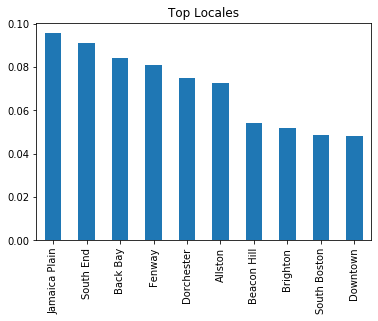

In [20]:
loc_vals = boston_data_new['neighbourhood_cleansed'].value_counts()

(loc_vals[0:10]/boston_data_new.shape[0]).plot(kind="bar");
plt.title("Top Locales");


In [21]:
list(zip(X_seattle.columns, lm_model_sea.coef_))

[('number_of_reviews', -0.13674967428628),
 ('bedrooms', 45.10044410249762),
 ('bathrooms', 32.40336700413474),
 ('Private room', -44.986200222619814),
 ('Shared room', -87.4887610560294),
 ('Alki', 34.929032102131345),
 ('Arbor Heights', -2.076159868996252),
 ('Atlantic', -5.872920297369323),
 ('Belltown', 59.641389625865195),
 ('Bitter Lake', 5.297782845201118),
 ('Briarcliff', 38.53532727445031),
 ('Brighton', 8.369921431028875),
 ('Broadview', -9.307340097311975),
 ('Broadway', 37.709076403644275),
 ('Bryant', -7.662958038864827),
 ('Cedar Park', -4.424461956417953),
 ('Central Business District', 55.67884726743967),
 ('Columbia City', -16.87136166962799),
 ('Crown Hill', -26.093994212549003),
 ('Dunlap', -10.941423005929222),
 ('East Queen Anne', 26.71621641965228),
 ('Eastlake', 42.17069438279117),
 ('Fairmount Park', 10.619784804535902),
 ('Fauntleroy', 6.831601679308879),
 ('First Hill', 49.16609755389985),
 ('Fremont', 20.21834724616339),
 ('Gatewood', 15.989286629274964),
 ('

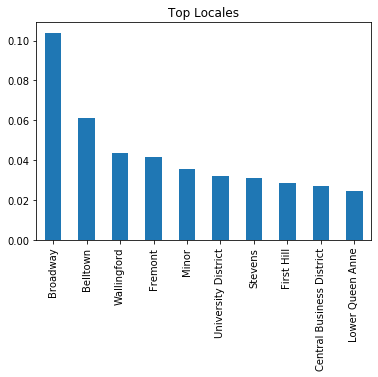

In [22]:
loc_vals = seattle_data_new['neighbourhood_cleansed'].value_counts()

(loc_vals[0:10]/seattle_data_new.shape[0]).plot(kind="bar");
plt.title("Top Locales");

# Answer 2

We see that for both Seattle and Boston Dataset, the location of the Airbnb matters the most. For some of the selected locations, the effects on the prices are high.

Apart from the Locations, the other top two factors which increases the prices are no. of bedrooms and bathrooms. While, the features shared room and private rooms are least opted by customers and the effect these have a negative impact on the prices. 

One more trend we see that, even though number of Airbnb rooms are more in some places in both Bostona nnd Seattle, the effect they have on prices are not high. This suggests that, higher number of rooms are present in an average priced localities.



# Question 3
What are the top amenities people needs most?

In [77]:
def new_amenities_df(df):
    Q = pd.DataFrame()
    Q['TV'] = df.amenities.str.contains("tv", case=False)
    Q['Internet'] = df.amenities.str.contains("internet", case=False)
    Q['conditioning'] = df.amenities.str.contains("conditioning", case=False)
    Q['Kitchen'] = df.amenities.str.contains("kitchen", case=False)
    Q['Heater'] = df.amenities.str.contains("heat", case=False)
    Q['Family Friendly'] = df.amenities.str.contains("family", case=False)
    Q['Parking'] = df.amenities.str.contains("parking", case=False)
    Q['First Aid'] = df.amenities.str.contains("first aid", case=False)
    Q['smoke detector'] = df.amenities.str.contains("detector", case=False)
    Q['Extinguisher'] = df.amenities.str.contains("extinguisher", case=False)
    Q['Pet friendly'] = df.amenities.str.contains("pets", case=False)
    Q['price'] = df['price']

    return Q

In [78]:
boston_amenities = new_amenities_df(boston_data_new)
boston_amenities

,TV,Internet,conditioning,Kitchen,Heater,Family Friendly,Parking,First Aid,smoke detector,Extinguisher,Pet friendly,price
0,True,True,False,True,True,True,True,False,True,True,True,250.0
1,True,True,True,True,True,True,False,False,True,True,True,65.0
2,True,True,True,True,True,False,True,True,True,False,False,65.0
3,True,True,True,True,True,False,True,True,True,True,False,75.0
4,False,True,True,True,True,False,False,True,True,False,False,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3580,False,True,True,True,True,True,True,False,True,True,False,69.0
3581,True,True,True,True,True,True,True,False,True,True,True,150.0
3582,False,False,False,False,False,False,False,False,False,False,False,198.0
3583,False,False,False,True,False,True,False,False,False,False,False,65.0


In [79]:
seattle_amenities = new_amenities_df(seattle_data_new)
seattle_amenities

,TV,Internet,conditioning,Kitchen,Heater,Family Friendly,Parking,First Aid,smoke detector,Extinguisher,Pet friendly,price
0,True,True,True,True,True,True,False,False,False,False,False,85.0
1,True,True,False,True,True,True,True,True,True,True,False,150.0
2,True,True,True,True,True,True,True,False,True,False,True,975.0
3,False,True,False,True,True,True,False,False,True,True,False,100.0
4,True,True,False,True,True,True,False,True,True,True,False,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3813,True,True,True,True,True,True,True,False,True,True,False,359.0
3814,True,True,False,True,True,True,True,False,True,True,False,79.0
3815,True,True,False,True,True,False,True,True,True,True,True,93.0
3816,True,True,False,True,True,False,True,False,True,False,False,99.0


In [81]:
X_bos_am = boston_amenities[['TV','Internet','conditioning','Kitchen','Heater','Family Friendly','Parking','First Aid',
                            'smoke detector','Extinguisher', 'Pet friendly']]
y_bos_am = boston_amenities['price']

In [82]:
X_sea_am = seattle_amenities[['TV','Internet','conditioning','Kitchen','Heater','Family Friendly','Parking','First Aid',
                            'smoke detector','Extinguisher', 'Pet friendly']]
y_sea_am = seattle_amenities['price']

In [83]:
X_bos_train_am, X_bos_test_am, y_bos_train_am, y_bos_test_am = train_test_split(X_bos_am, y_bos_am, test_size = .25, random_state=42) 

lm_model_bos_am = LinearRegression(normalize=True) 
lm_model_bos_am.fit(X_bos_train_am, y_bos_train_am) 
        
y_bos_test_preds_am = lm_model_bos_am.predict(X_bos_test_am) 
"The r-squared score for the model is {} on {} values.".format(r2_score(y_bos_test_am, y_bos_test_preds_am), len(y_bos_test_am))

'The r-squared score for the model is 0.10436171571466113 on 897 values.'

In [84]:
X_sea_train_am, X_sea_test_am, y_sea_train_am, y_sea_test_am = train_test_split(X_sea_am, y_sea_am, test_size = .25, random_state=42) 

lm_model_sea_am = LinearRegression(normalize=True) 
lm_model_sea_am.fit(X_sea_train_am, y_sea_train_am) 
        
y_sea_test_preds_am = lm_model_sea_am.predict(X_sea_test_am) 
"The r-squared score for the model is {} on {} values.".format(r2_score(y_sea_test_am, y_sea_test_preds_am), len(y_sea_test_am))

'The r-squared score for the model is 0.12634854380179528 on 955 values.'

In [85]:
list(zip(X_bos_am.columns, lm_model_bos_am.coef_))

[('TV', 63.34069708630613),
 ('Internet', -18.585955866334427),
 ('conditioning', 41.82381116035777),
 ('Kitchen', 13.476921369435694),
 ('Heater', -13.377243552311066),
 ('Family Friendly', 51.33395771204951),
 ('Parking', -37.03047161661335),
 ('First Aid', -16.804193723225428),
 ('smoke detector', -12.41733270053174),
 ('Extinguisher', 10.423339160675429),
 ('Pet friendly', -0.17823837606307552)]

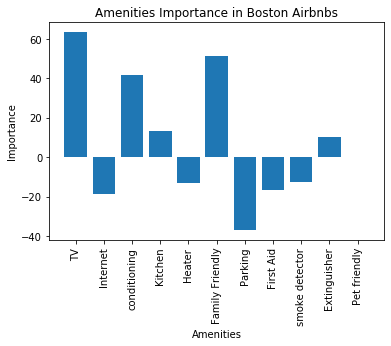

In [89]:
# this is for plotting purpose
index = np.arange(len(X_bos_am.columns))
plt.bar(index, lm_model_bos_am.coef_)
plt.xlabel('Amenities')
plt.ylabel('Importance')
plt.xticks(index, X_bos_am.columns, rotation=90)
plt.title('Amenities Importance in Boston Airbnbs')
plt.show()
    

In [90]:
list(zip(X_sea_am.columns, lm_model_sea_am.coef_))

[('TV', 32.146591520468306),
 ('Internet', -23.347290272296775),
 ('conditioning', 17.421815742468613),
 ('Kitchen', 23.922345670896195),
 ('Heater', -21.221664569773626),
 ('Family Friendly', 41.912334545941334),
 ('Parking', 5.293357526894547),
 ('First Aid', -1.6622575496562202),
 ('smoke detector', -7.625460480442049),
 ('Extinguisher', 3.195469169765978),
 ('Pet friendly', -11.401756631735509)]

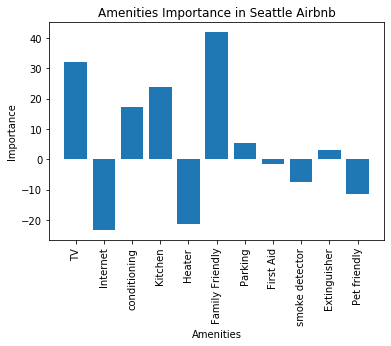

In [91]:
index = np.arange(len(X_sea_am.columns))
plt.bar(index, lm_model_sea_am.coef_)
plt.xlabel('Amenities')
plt.ylabel('Importance')
plt.xticks(index, X_sea_am.columns, rotation=90)
plt.title('Amenities Importance in Seattle Airbnb')
plt.show()
    

# Answer 3

For both the cities, we see that the orices increase when they have TV, Air Conditioning, Kitchen and the rooms are family Friendly. The other factors do not contribute much to the increse of price of Airbnbs.